## Problem 24: Larmor Precession (Phase Evolution)

**Physics:**  
Unitary evolution under a longitudinal field ($H \propto \sigma_z$) does not change the populations of the energy eigenstates, but it rotates the **relative phase** of a superposition. This effect is known as **Larmor precession**.

**System:** A two-level quantum system (qubit).

**Tasks:**

1. **Initial State:** Create the superposition state  
   $|\psi_0\rangle = (|0\rangle + |1\rangle)/\sqrt{2}$.

2. **Hamiltonian:** Define the Hamiltonian  
   $H = \pi\,\sigma_z$.

3. **Time Evolution:**  
   - Define `ttimes = [0, 0.5, 1.0]`.  
   - Use `mesolve(H, psi0, times, [], [])` to evolve the state and obtain the state vectors from `result.states`.

4. **Analysis:** Print the states at  
   - $t = 0$  
   - $t = 0.5$  
   - $t = 1.0$

**Expected Physics Check:**

- **At $t = 0$:** The state should be approximately `[0.707, 0.707]`.
- **At $t = 0.5$:** The relative phase is $e^{-i\pi/2} = -i$, corresponding to a $\pi/2$ phase rotation.
- **At $t = 1.0$:** The state should return to the equatorial plane with a relative minus sign, corresponding to  
  $|-\rangle = (|0\rangle - |1\rangle)/\sqrt{2}$, up to a global phase.


In [44]:
from qutip import *
import numpy as np
import matplotlib.pyplot as plt
psi = (basis(2,0)+basis(2,1)).unit()
H = np.pi*sigmaz()                  # Hamiltonian
times = [0,0.5,1.0]   # Time array
result = mesolve(H,psi,times,[],[])  # Evolve mesolve(H, psi0, tlist, c_ops, e_ops)
for i ,t in enumerate(times):
    print(f"Times {t}:\n{result.states[i]}")


Times 0:
Quantum object: dims=[[2], [1]], shape=(2, 1), type='ket', dtype=Dense
Qobj data =
[[0.70710678]
 [0.70710678]]
Times 0.5:
Quantum object: dims=[[2], [1]], shape=(2, 1), type='ket', dtype=Dense
Qobj data =
[[-6.3043358e-07-0.70710678j]
 [-6.3043358e-07+0.70710678j]]
Times 1.0:
Quantum object: dims=[[2], [1]], shape=(2, 1), type='ket', dtype=Dense
Qobj data =
[[-0.70710678+3.52384327e-07j]
 [-0.70710678-3.52384327e-07j]]


**Physics Check:**

- **Time 0.5:** The state is `[-0.707j, 0.707j]`. Factoring out a global phase of $-i$ gives  
  $(|0\rangle - |1\rangle)/\sqrt{2}$.  
  This shows that the **relative phase** between $|0\rangle$ and $|1\rangle$ has rotated by $\pi$ (from “$+$” to “$-$”).

- **Time 1.0:** The state is `[-0.707, -0.707]`, which is simply $-1 \times |+\rangle$.  
  The system has returned to the original superposition, but with an overall **global phase** of $-1$. This phase is physically unobservable, but it is mathematically correct for a $\pi$ rotation.


## Problem 25: The Rabi Flip (Population Transfer)

**Physics:**  
So far, we have seen how a Hamiltonian proportional to $\sigma_z$ changes the **phase** of a superposition without changing populations.  
To **flip a qubit** from $|0\rangle$ to $|1\rangle$, the Hamiltonian must *connect* these states. This requires an **off-diagonal operator**, such as $\sigma_x$.

If  
$H = \frac{\Omega}{2}\,\sigma_x$,  
then the probability of finding the system in the excited state is  
$P_1(t) = \sin^2\!\left(\frac{\Omega t}{2}\right)$.

In this problem, set $\Omega = 1$, so  
$H = 0.5\,\sigma_x$.

A **full population flip** ($P_1 = 1$) should occur at $t = \pi$.

**System:** A two-level quantum system (qubit).

**Tasks:**

1. **Initial State:** Create the ground state $|0\rangle$.

2. **Hamiltonian:** Define the Hamiltonian  
   $H = 0.5 \times \sigma_x$  
   using `sigmax()`.

3. **Time Evolution:**  
   - Evolve the system from $t = 0$ to $t = 2\pi$.  
   - Use 100 time steps.

4. **Expectation Value:** Track the population of the excited state using either  
   - the number operator `num(2)`, or  
   -  the projector onto the excited state $|1\rangle\langle 1|$, which in QuTiP is created using  
  `basis(2, 1) * basis(2, 1).dag()`


5. **Plot:** Plot the excited-state population as a function of time.

**Expected Physics Check:**  
The plot should show a $\sin^2$ curve:
- starting at 0,
- reaching a maximum of 1 at $t = \pi$,
- and returning to 0 at $t = 2\pi$.

This is the hallmark of **Rabi oscillations**.



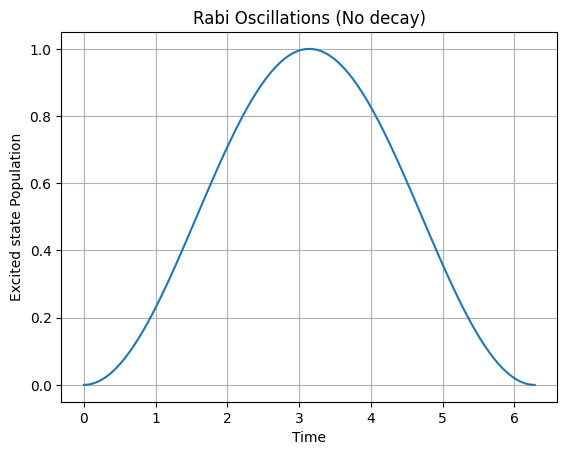

Population at t=pi (approx index 50): 0.9997


In [17]:
psi0 = basis(2,0)
H = 0.5*sigmax()
times = np.linspace(0,2*np.pi,100)
result = mesolve(H,psi0,times,[],[num(2)])
plt.plot(times,result.expect[0])
plt.xlabel("Time")
plt.ylabel("Excited state Population")
plt.title("Rabi Oscillations (No decay)")
plt.grid(True)
plt.show()
print(f"Population at t=pi (approx index 50): {result.expect[0][50]:.4f}")

## Problem 26: Detuned Rabi Oscillations

**Physics:**  
In Problem 25, we had perfect population transfer because the driving field was exactly on resonance.  
If we introduce a **detuning** $\Delta$ (represented by a $\sigma_z$ term), the qubit still tries to flip, but the **axis of rotation tilts** away from the equator of the Bloch sphere.

The effective Hamiltonian is  
$H = \frac{\Delta}{2}\,\sigma_z + \frac{\Omega}{2}\,\sigma_x$.

**Consequence:**  
- The qubit oscillates **faster**.
- The oscillation **amplitude is reduced**.
- The excited-state population never reaches 1.

This sets a fundamental limit in quantum control.

**System:** A two-level quantum system (qubit).

**Tasks:**

1. **Initial State:** Create the ground state $|0\rangle$.

2. **Hamiltonian:** Define  
   $H = 0.5\,\sigma_z + 0.5\,\sigma_x$,  
   corresponding to $\Delta = 1.0$ and $\Omega = 1.0$.

3. **Time Evolution:**  
   - Evolve the system from $t = 0$ to $t = 4\pi$.  
   - Use a sufficiently fine time grid to clearly resolve the oscillations.

4. **Expectation Value:** Track the excited-state population using `num(2)`.

5. **Plot:** Plot the excited-state population as a function of time.

**What to Look For:**

- **Maximum Population:**  
  Does the excited-state population reach 1.0?  
  It should not. The maximum value should be  
  $\Omega^2 / (\Omega^2 + \Delta^2) = 0.5$.

- **Oscillation Frequency:**  
  Is the oscillation faster than in Problem 24?  
  Yes. The effective Rabi frequency is  
  $\sqrt{\Omega^2 + \Delta^2}$.

This behavior is known as **detuned Rabi oscillations** and is a cornerstone of driven two-level dynamics.


/tmp/ipykernel_12153/1281357965.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


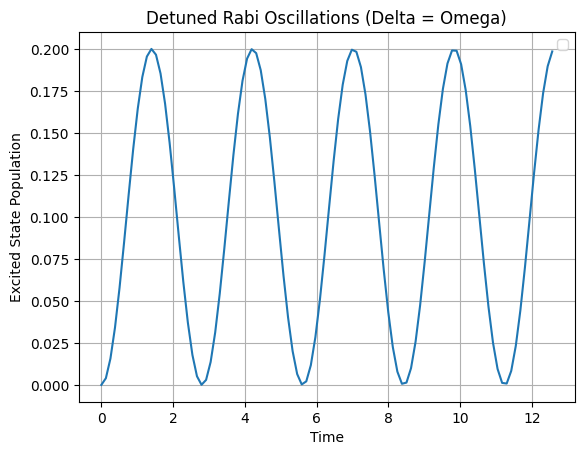

In [ ]:
psi0 = basis(2,0)
delta = 1.0
omega = 1.0
H = delta*0.5*sigmaz() + omega*0.5*sigmax()
c_ops = []
e_ops = [num(2)]
times = np.linspace(0,4*np.pi,100)
result = mesolve(H,psi0,times,c_ops,e_ops)
plt.plot(times,result.expect[0])
plt.xlabel("Time")
plt.ylabel("Excited State Population")
plt.title("Detuned Rabi Oscillations (Delta = Omega)")
plt.legend()
plt.grid(True)
plt.show()


## Problem 27: Spin Echo (Fixing the Detuning)

**Physics:**  
In real experiments (such as MRI and quantum computing), *detuning* is often an unwanted error caused by inhomogeneous fields. Different qubits (or atoms) experience slightly different magnetic fields, so they precess at different rates and gradually **dephase**.

A **spin echo** sequence cancels this error:

- Wait for a time $\tau$ → the qubit dephases.
- Apply a $\pi$-pulse (a $180^\circ$ rotation about the X-axis).
- Wait for another time $\tau$ → the accumulated phase error reverses.
- The qubit **refocuses**, undoing the detuning effect.

---

**System:** A two-level quantum system (qubit).

**Goal:** Demonstrate that detuning-induced phase errors can be reversed using a spin echo sequence.

---

**Tasks:**

1. **Initial State:**  
   Create the superposition state  
   $|+\rangle = (|0\rangle + |1\rangle)/\sqrt{2}$.  
   This state is maximally sensitive to phase errors.

2. **Step 1 — Dephasing:**  
   - Define the Hamiltonian $H = \Delta\,\sigma_z$ with $\Delta = 1.0$.  
   - Evolve the state for a time $\tau = 2.0$.  
   - Call the resulting state `psi_step1`.

3. **Step 2 — $\pi$-Pulse:**  
   - Apply a $180^\circ$ rotation about the X-axis using  
     $U_\pi = -i\,\sigma_x$.  
   - Compute  
     `psi_flipped = (-1j * sigmax()) * psi_step1`.

4. **Step 3 — Refocusing:**  
   - Take `psi_flipped` and evolve it again under  
     $H = \Delta\,\sigma_z$ for the same time $\tau = 2.0$.  
   - Call the resulting state `psi_final`.

5. **Check (Measurement):**  
   - Compute the expectation value of $\sigma_x$ for `psi_final`.

---

**Expected Physics Check:**

- If the spin echo worked, the final state should point along the X-axis again.
- The expectation value should satisfy  
  $\langle \sigma_x \rangle \approx 1.0$.
- This confirms that the phase error introduced by detuning was **cancelled**.

Spin echo is a cornerstone technique in NMR, MRI, and quantum error mitigation.


In [42]:
delta = 1.0
tau = 2.0
psi0 = (basis(2,0)+basis(2,1)).unit() 
print(f"Start <sigma_x>: {expect(sigmax(),psi0)}")
H_error = delta*sigmaz()
times = [0,tau]
c_ops = []
e_ops = []
result1 = mesolve(H_error,psi0,times,c_ops,e_ops)
psi1 = result1.states[-1]
print(f"After wait <sigma_x>: {expect(sigmax(),psi1)}")
psi_flipped = (-1j*sigmax())*psi1
result2 = mesolve(H_error,psi_flipped,times,c_ops,e_ops)
psi_final = result2.states[-1]
print(f"Final <sigma_x>: {expect(sigmax(),psi_final)}")

Start <sigma_x>: 0.9999999999999998
After wait <sigma_x>: -0.6536420647723018
Final <sigma_x>: 0.9999999999999998


## Problem 28: Ramsey Fringe (Interference)

**Physics:**  
In the spin echo experiment, a $\pi$-pulse cancels phase errors.  
In **Ramsey interferometry**, we instead *measure* those phase errors very precisely using a  
$\pi/2$ – wait – $\pi/2$ sequence.

The sequence works as follows:

- Start in the ground state $|0\rangle$.
- Apply a $\pi/2$ pulse → create a superposition ($|+\rangle$-like state).
- Wait for a time $\tau$ → a relative phase $e^{-i\Delta\tau}$ accumulates.
- Apply another $\pi/2$ pulse → phase information is converted into population.

**Result:**  
The probability of finding the system in the excited state oscillates as  
$P_1(\tau) = \cos^2(\Delta \tau / 2)$.

This oscillation is known as a **Ramsey fringe** and is widely used for precision frequency measurements.

---

**System:** A two-level quantum system (qubit).

---

**Tasks:**

1. **Initial State:**  
   Create the ground state $|0\rangle$.

2. **First Pulse ($\pi/2$):**  
   Apply a $\pi/2$ rotation about the Y-axis using  
   $R_y(\pi/2) = e^{-i \frac{\pi}{4} \sigma_y}$.  

   In QuTiP, construct it explicitly as  
   `(-1j * (np.pi/4) * sigmay()).expm()`.

3. **Free Evolution (Wait):**  
   - Define the Hamiltonian $H = \Delta\,\sigma_z$.  
   - Evolve the state for a variable wait time $\tau$.

4. **Second Pulse ($\pi/2$):**  
   Apply the same Y-axis $\pi/2$ rotation again.

5. **Measurement:**  
   - Measure the excited-state population $P_1(\tau)$.  
   - Plot $P_{excited}$ as a function of the wait time $\tau$.

---

**Expected Physics Check:**

- The excited-state population should oscillate with $\tau$.
- The oscillation follows  
  $P_1(\tau) = \cos^2(\Delta \tau / 2)$.
- This interference pattern is the **Ramsey fringe**, revealing the detuning $\Delta$.

Ramsey interferometry is a cornerstone of atomic clocks, NMR, and quantum metrology.


## Problem 29: The Quantum Harmonic Oscillator (Coherent State)

**Physics:**  
A quantum harmonic oscillator (such as a vibrating atom or a particle in a quadratic potential) has an infinite ladder of energy eigenstates  
$|0\rangle, |1\rangle, |2\rangle, \dots$.

A **coherent state** $|\alpha\rangle$ is a special superposition of these states that behaves most like a classical particle. Under harmonic evolution, it oscillates back and forth in the potential well **without changing shape**.

---

**System:** A quantum harmonic oscillator with a finite Hilbert-space cutoff.

---

**Tasks:**

1. **Hilbert Space:**  
   Define the Hilbert-space dimension (cutoff) as  
   `N = 25`.

2. **Operators:**  
   - Define the annihilation operator `a = destroy(N)`.  
   - Define the Hamiltonian  
     $H = a^\dagger a$  
     (this is the number operator; you may also use `num(N)`).

3. **Initial State:**  
   Create a coherent state with amplitude $\alpha = 2.0$ using  
   `coherent(N, alpha)`.

4. **Position Operator:**  
   Define the position operator  
   $\hat{x} = (a + a^\dagger)/\sqrt{2}$.

5. **Time Evolution:**  
   - Evolve the system from $t = 0$ to $t = 4\pi$.  
   - Use a sufficiently fine time grid.

6. **Expectation Value:**  
   Track the expectation value $\langle x \rangle$ as a function of time.

7. **Plot:**  
   Plot $\langle x \rangle$ versus time.

---

**Expected Result:**  

- The plot should be a **perfect cosine wave**.  
- The motion starts at  
  $x(0) \approx 2\sqrt{2} \approx 2.8$.  
- This demonstrates that coherent states follow **classical harmonic motion** while remaining fully quantum.

This is one of the clearest examples of the **quantum–classical correspondence**.


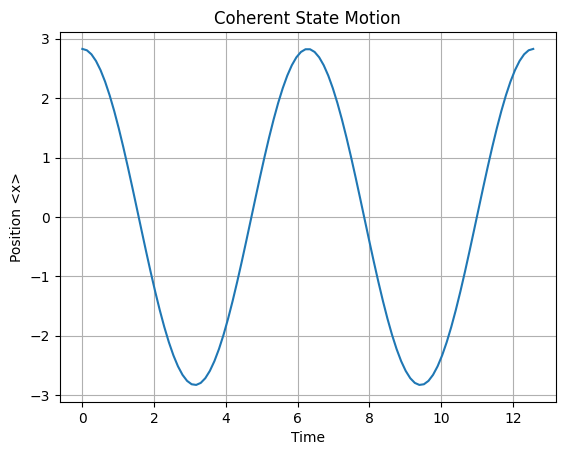

In [49]:
N = 25
a = destroy(25)
H = num(25)
alpha = 2.0
psi0 = coherent(N,alpha)
x = (a + a.dag())*(1/np.sqrt(2))
times = np.linspace(0,4*np.pi,100)
c_ops = []
e_ops = [x]
result = mesolve(H,psi0,times,c_ops,e_ops)
expectation = result.expect[0]
plt.plot(times,expectation)
plt.xlabel("Time")
plt.ylabel("Position <x>")
plt.title("Coherent State Motion")
plt.grid(True)
plt.show()